In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
data = pd.read_csv('heart.csv', delimiter=',')

In [3]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


age (возраст в годах)

sex (1 = мужчина; 0 = женщина)

cp (тип боли в груди)

trestbps (артериальное давление в состоянии покоя (в мм рт. cт.) при поступлении в больницу)

chol (уровень холестерина в мг/дл)

fbs (уровень сахара в крови > 120 мг / дл) (1 = истина; 0 = ложь)

restecg (результаты электрокардиографии в покое)

thalach (максимальная частота сердечных сокращений )

exang (стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет))

oldpeak (ухудшение ST, вызванная физическими упражнениями относительно отдыха)

slope (наклон пика упражнений сегмента ST)

ca (количество крупных сосудов (0-3), окрашенных с помощью флуороскопии)

thal (3 = нормальный; 6 = исправленный дефект; 7 = обратимый дефект)

target (1 или 0)

In [4]:
data.shape

(303, 14)

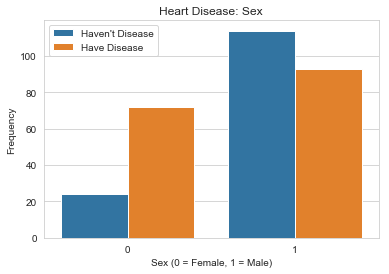

In [5]:
# Посмотрим на распределение людей по полу
male = len(data[data.sex == 1])
female = len(data[data.sex == 0])
sns.countplot('sex', hue='target', data=data)
plt.title('Heart Disease: Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

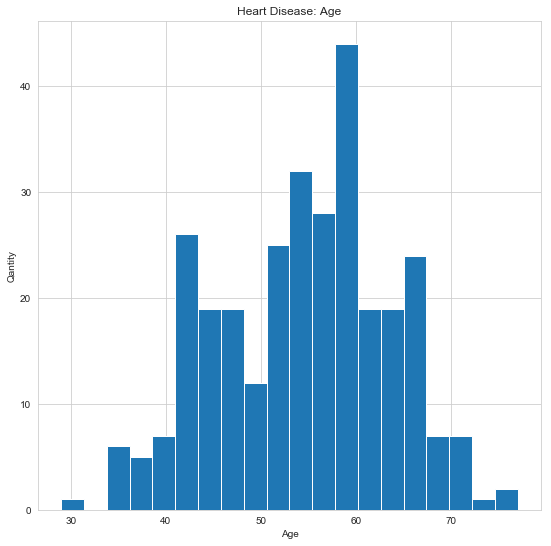

In [6]:
# Посмотрим на распределение людей по возрасту
plt.figure(figsize=(9, 9))
plt.title('Heart Disease: Age')
plt.xlabel('Age')
plt.ylabel('Qantity')
data['age'].hist(bins=20)
plt.show()

In [7]:
data_v = data.iloc[:, 0:13].values
print('Вектор признаков:', data_v[1])

Вектор признаков: [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
   2. ]


## Глянем на общее распределение. Может, что-нибудь узнаем

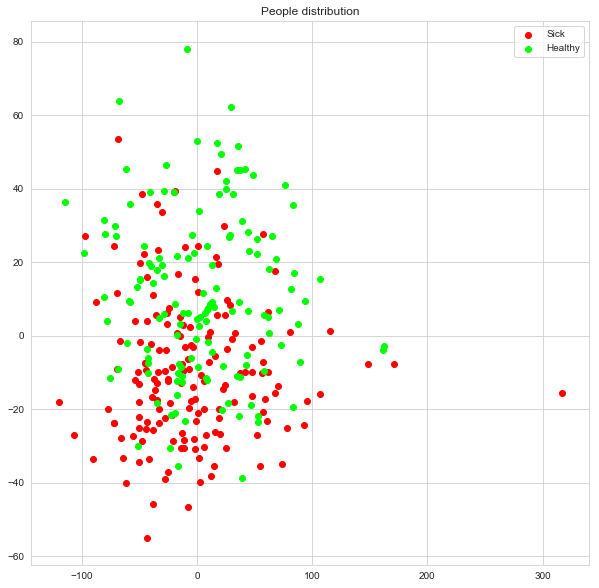

In [8]:
#Понизим размерность до 2 для визуализации
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data_v)
data_2d = pca.transform(data_v)

#Построим график по двухмерной матрице
colormap = np.array(['red', 'lime'])
plt.figure(figsize=(10, 10))

for i in range(0, data_2d.shape[0]):
    if data['target'][i] == 1:
        c1 = plt.scatter(data_2d[i, 0], data_2d[i, 1], c='red')
    elif data['target'][i] == 0:
        c2 = plt.scatter(data_2d[i, 0], data_2d[i, 1], c='lime')

plt.title('People distribution')
plt.legend([c1, c2], ['Sick', 'Healthy'])

Как мы видим, не так уж и сильно они отличаются. Больные, правда, повыше. Кластеризовать такое было бы сложно

Под конец глянем на корреляцию признаков

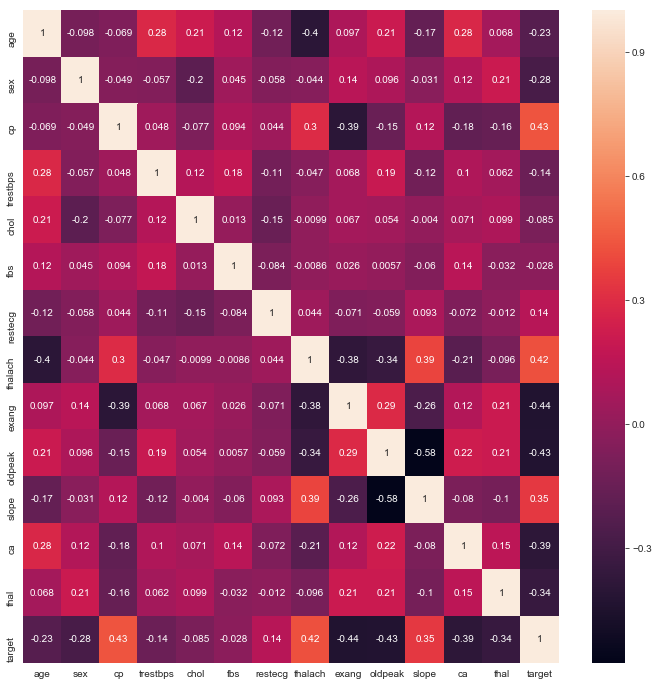

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

Всё просто! Поменьше thalach, побольше oldpeak, и всё будет хорошо

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation ,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [11]:
data_pop = data.drop("target", axis=1)
target = data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(data_pop, target, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Сеточка из кераса

model = Sequential()
model.add(Dense(15, init = 'uniform', activation='relu', input_dim=13))
model.add(Dense(10, init = 'uniform', activation='relu'))
model.add(Dense(6, init = 'uniform', activation='relu'))
model.add(Dense(1, init = 'uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Обучаем
model.fit(X_train, Y_train, epochs=250)

Epoch 1/250
212/212 [==============================] - 0s 2ms/step - loss: 0.6931 - acc: 0.5472
Epoch 2/250
212/212 [==============================] - 0s 38us/step - loss: 0.6927 - acc: 0.5566
Epoch 3/250
212/212 [==============================] - 0s 0us/step - loss: 0.6923 - acc: 0.5566
Epoch 4/250
212/212 [==============================] - 0s 74us/step - loss: 0.6919 - acc: 0.5566
Epoch 5/250
212/212 [==============================] - 0s 74us/step - loss: 0.6912 - acc: 0.5566
Epoch 6/250
212/212 [==============================] - 0s 0us/step - loss: 0.6902 - acc: 0.5566
Epoch 7/250
212/212 [==============================] - 0s 74us/step - loss: 0.6889 - acc: 0.5566
Epoch 8/250
212/212 [==============================] - 0s 0us/step - loss: 0.6871 - acc: 0.5566
Epoch 9/250
212/212 [==============================] - 0s 74us/step - loss: 0.6848 - acc: 0.5566
Epoch 10/250
212/212 [==============================] - 0s 86us/step - loss: 0.6815 - acc: 0.5566
Epoch 11/250
212/212 [===========

212/212 [==============================] - 0s 90us/step - loss: 0.2531 - acc: 0.9198
Epoch 85/250
212/212 [==============================] - 0s 42us/step - loss: 0.2525 - acc: 0.9198
Epoch 86/250
212/212 [==============================] - 0s 42us/step - loss: 0.2514 - acc: 0.9198
Epoch 87/250
212/212 [==============================] - 0s 52us/step - loss: 0.2514 - acc: 0.9198
Epoch 88/250
212/212 [==============================] - 0s 47us/step - loss: 0.2500 - acc: 0.9198
Epoch 89/250
212/212 [==============================] - 0s 47us/step - loss: 0.2494 - acc: 0.9198
Epoch 90/250
212/212 [==============================] - 0s 10us/step - loss: 0.2484 - acc: 0.9245
Epoch 91/250
212/212 [==============================] - 0s 74us/step - loss: 0.2478 - acc: 0.9245
Epoch 92/250
212/212 [==============================] - 0s 0us/step - loss: 0.2473 - acc: 0.9245
Epoch 93/250
212/212 [==============================] - 0s 74us/step - loss: 0.2470 - acc: 0.9245
Epoch 94/250
212/212 [============

212/212 [==============================] - 0s 74us/step - loss: 0.1955 - acc: 0.9434
Epoch 167/250
212/212 [==============================] - 0s 74us/step - loss: 0.1954 - acc: 0.9434
Epoch 168/250
212/212 [==============================] - 0s 0us/step - loss: 0.1946 - acc: 0.9481
Epoch 169/250
212/212 [==============================] - 0s 74us/step - loss: 0.1942 - acc: 0.9481
Epoch 170/250
212/212 [==============================] - 0s 74us/step - loss: 0.1932 - acc: 0.9481
Epoch 171/250
212/212 [==============================] - 0s 0us/step - loss: 0.1931 - acc: 0.9481
Epoch 172/250
212/212 [==============================] - 0s 74us/step - loss: 0.1927 - acc: 0.9481
Epoch 173/250
212/212 [==============================] - 0s 0us/step - loss: 0.1917 - acc: 0.9481
Epoch 174/250
212/212 [==============================] - 0s 104us/step - loss: 0.1913 - acc: 0.9481
Epoch 175/250
212/212 [==============================] - 0s 0us/step - loss: 0.1906 - acc: 0.9481
Epoch 176/250
212/212 [====

212/212 [==============================] - 0s 52us/step - loss: 0.1502 - acc: 0.9481
Epoch 249/250
212/212 [==============================] - 0s 52us/step - loss: 0.1499 - acc: 0.9481
Epoch 250/250
212/212 [==============================] - 0s 47us/step - loss: 0.1493 - acc: 0.9481


In [13]:
#Тестируем
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape

(91, 1)

In [14]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn, Y_test)*100,2)
print("Accuracy score: " + str(score_nn) + " %")

Accuracy score: 86.81 %
